In [1]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import platform

# Mac용 폰트 설정
if platform.system() == 'Darwin':  # Mac
    plt.rcParams['font.family'] = 'AppleGothic'
    # 또는 다른 Mac 폰트들:
    # plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
    # plt.rcParams['font.family'] = 'AppleMyungjo'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print(f"✓ 폰트 설정 완료: {plt.rcParams['font.family']}")

✓ 폰트 설정 완료: ['AppleGothic']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 폰트 캐시 새로고침
fm._load_fontmanager(try_read_cache=False)

print(f"✓ 폰트 설정: {plt.rcParams['font.family']}")

Matplotlib is building the font cache; this may take a moment.


✓ 폰트 설정: ['AppleGothic']


총 9개의 JSON 파일 발견


파일 로딩: 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]


로드 완료: 279,992개 샘플
데이터 shape: (279992, 2)

처음 3개:
                                            dialogue  \
0  그럼 날짜는 가격 큰 변동 없으면 6.28-7.13로 확정할까? 우리 비행포함 15...   
1  Kf마스크만 5부제 하는거지? 응. 면마스크는 아무때나 사도될껀? 면마스크말고 부직...   
2  아 근데 케이크 업체들 봤는데 중앙동쪽 거기는 맛만있고 디자인은 그냥그런것같애 그러...   

                                             summary  
0               비행기 표 가격에 대해 이야기하며, 특가 이벤트를 기다리고 있다.  
1                비염이 있어서 싸게 나온 일회용 부직포 마스크를 사두려고 한다.  
2  케이크 업체 중 중앙동 쪽은 맛만 있고 디자인은 별로고 고잔동 케이크 업체는 배달도...  

평균 대화 길이: 130.9 글자
평균 요약 길이: 42.0 글자
압축 비율: 32.10%


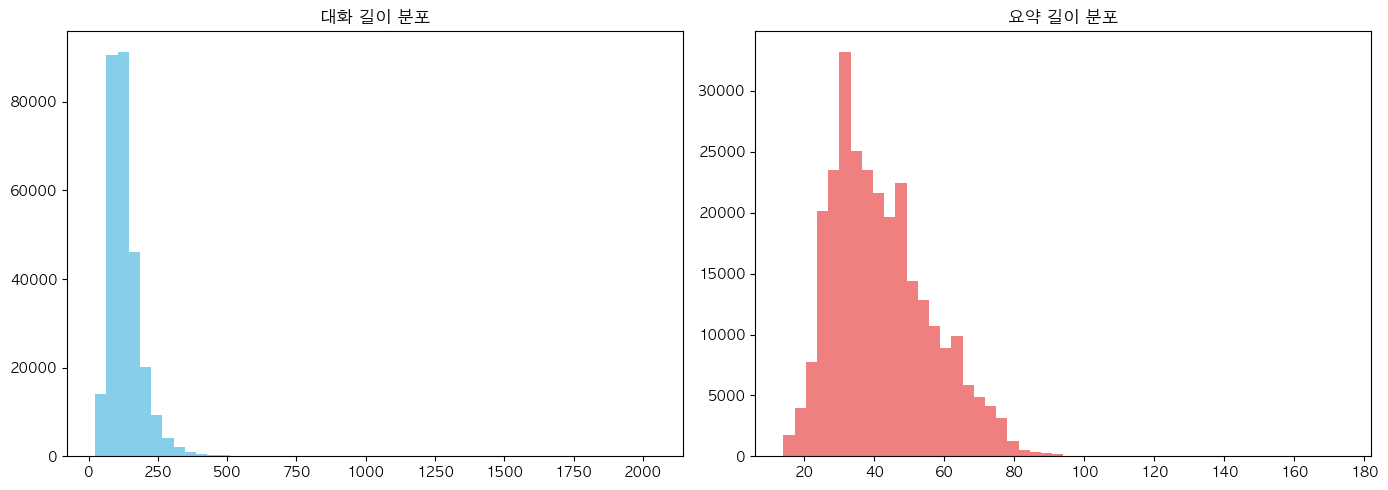

In [3]:
import pandas as pd
import json
import os
import numpy as np
from tqdm import tqdm

# 데이터 로드
train_data_path = './data/train/'

def load_json_data(data_dir):
    dialogues = []
    summaries = []
    
    json_files = [os.path.join(root, file) 
                  for root, dirs, files in os.walk(data_dir) 
                  for file in files if file.endswith('.json')]
    
    print(f"총 {len(json_files)}개의 JSON 파일 발견")
    
    for json_file in tqdm(json_files, desc="파일 로딩"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            if 'data' in data and isinstance(data['data'], list):
                for item in data['data']:
                    if 'body' in item and 'dialogue' in item['body']:
                        dialogue_list = item['body']['dialogue']
                        dialogue_text = ' '.join([utt['utterance'] for utt in dialogue_list if 'utterance' in utt])
                        
                        if 'summary' in item['body']:
                            summary = item['body']['summary']
                            
                            if dialogue_text and summary:
                                dialogues.append(dialogue_text)
                                summaries.append(summary)
                                
        except Exception as e:
            print(f"에러: {os.path.basename(json_file)}: {e}")
            continue
    
    print(f"로드 완료: {len(dialogues):,}개 샘플")
    return pd.DataFrame({'dialogue': dialogues, 'summary': summaries})

train_df = load_json_data(train_data_path)
print(f"데이터 shape: {train_df.shape}")

if len(train_df) > 0:
    print("\n처음 3개:")
    print(train_df.head(3))
    
    dialogue_lengths = [len(str(d)) for d in train_df['dialogue']]
    summary_lengths = [len(str(s)) for s in train_df['summary']]
    
    print(f"\n평균 대화 길이: {np.mean(dialogue_lengths):.1f} 글자")
    print(f"평균 요약 길이: {np.mean(summary_lengths):.1f} 글자")
    print(f"압축 비율: {np.mean(summary_lengths)/np.mean(dialogue_lengths):.2%}")
    
    try:
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        axes[0].hist(dialogue_lengths, bins=50, color='skyblue')
        axes[0].set_title('대화 길이 분포')
        axes[1].hist(summary_lengths, bins=50, color='lightcoral')
        axes[1].set_title('요약 길이 분포')
        plt.tight_layout()
        plt.show()
    except:
        pass
else:
    print("데이터가 로드되지 않았습니다!")


상세 EDA

📊 데이터셋 크기: 279,992개
컬럼: ['dialogue', 'summary']
결측치: {'dialogue': 0, 'summary': 0}

📏 대화 길이 통계:
  평균: 130.9 글자
  중앙값: 118.0 글자
  최소: 24 글자
  최대: 2044 글자
  표준편차: 59.4

📝 요약 길이 통계:
  평균: 42.0 글자
  중앙값: 40.0 글자
  최소: 14 글자
  최대: 174 글자
  표준편차: 14.1

📉 압축 비율: 32.10%


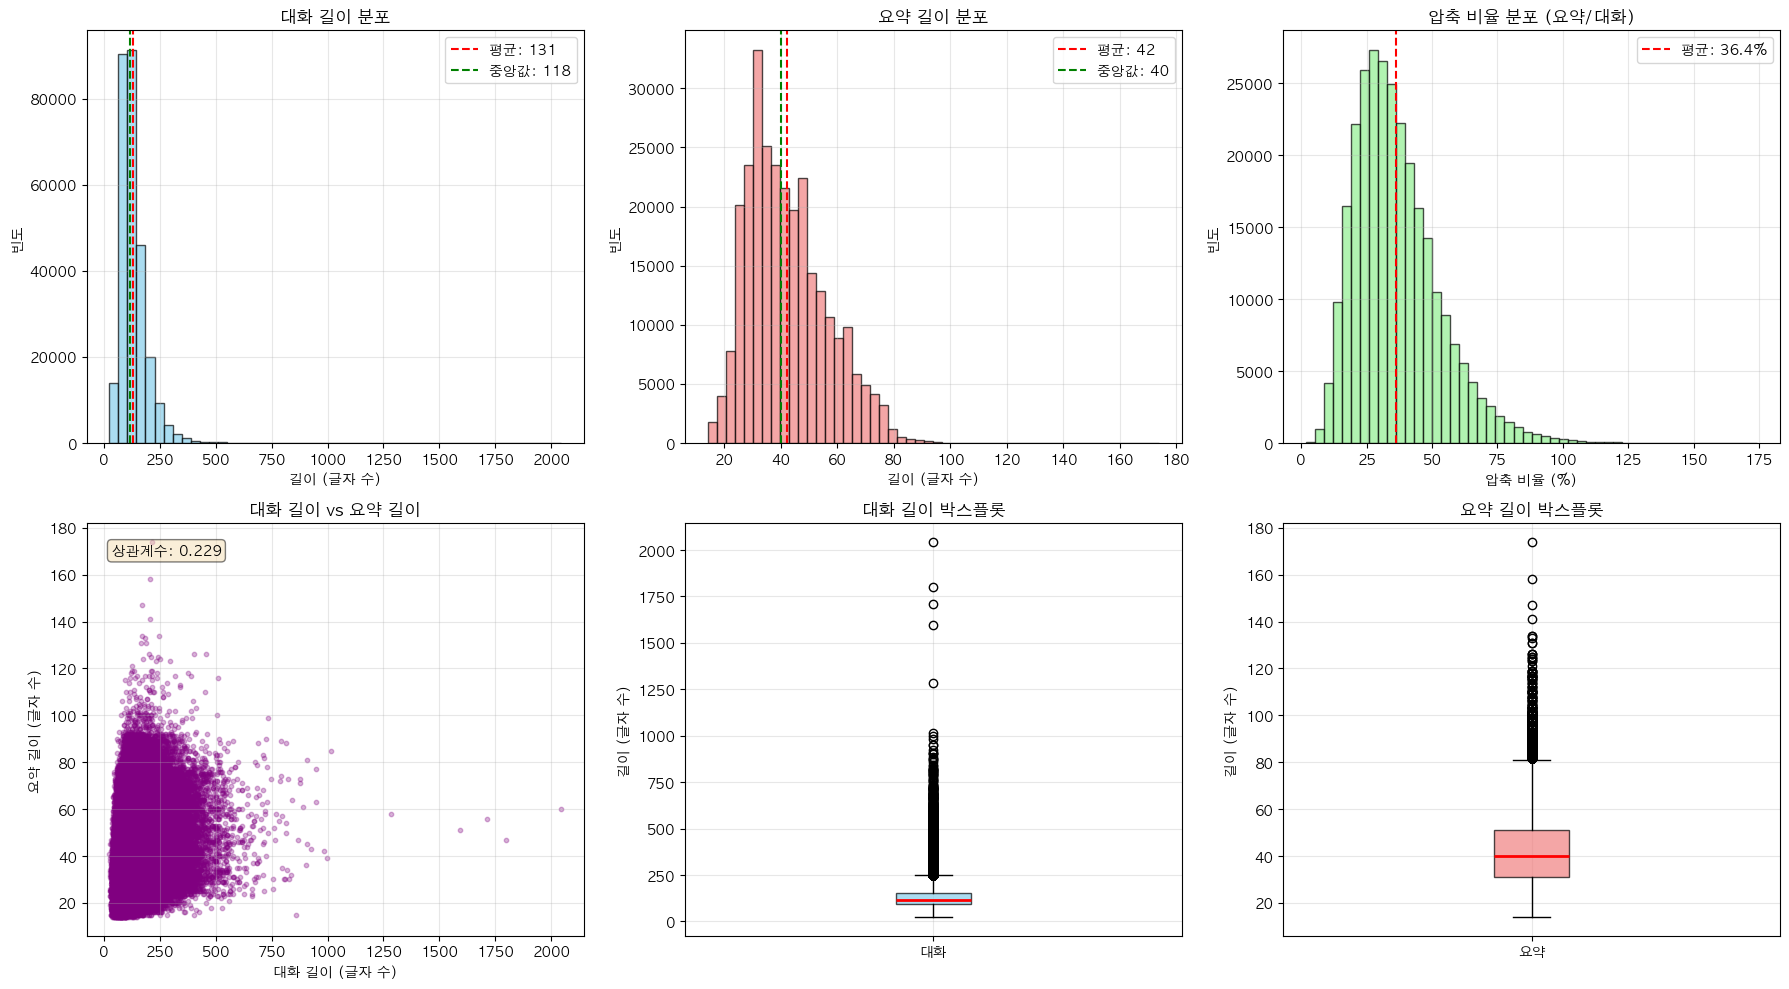

In [4]:
# ===== 상세 EDA 및 시각화 =====
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

print("="*60)
print("상세 EDA")
print("="*60)

# 1. 기본 통계
print(f"\n📊 데이터셋 크기: {len(train_df):,}개")
print(f"컬럼: {train_df.columns.tolist()}")
print(f"결측치: {train_df.isnull().sum().to_dict()}")

# 2. 길이 분석
dialogue_lengths = train_df['dialogue'].str.len()
summary_lengths = train_df['summary'].str.len()

print(f"\n📏 대화 길이 통계:")
print(f"  평균: {dialogue_lengths.mean():.1f} 글자")
print(f"  중앙값: {dialogue_lengths.median():.1f} 글자")
print(f"  최소: {dialogue_lengths.min()} 글자")
print(f"  최대: {dialogue_lengths.max()} 글자")
print(f"  표준편차: {dialogue_lengths.std():.1f}")

print(f"\n📝 요약 길이 통계:")
print(f"  평균: {summary_lengths.mean():.1f} 글자")
print(f"  중앙값: {summary_lengths.median():.1f} 글자")
print(f"  최소: {summary_lengths.min()} 글자")
print(f"  최대: {summary_lengths.max()} 글자")
print(f"  표준편차: {summary_lengths.std():.1f}")

print(f"\n📉 압축 비율: {summary_lengths.mean()/dialogue_lengths.mean():.2%}")
# 3. 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 3-1. 대화 길이 분포 (히스토그램)
axes[0, 0].hist(dialogue_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(dialogue_lengths.mean(), color='red', linestyle='--', label=f'평균: {dialogue_lengths.mean():.0f}')
axes[0, 0].axvline(dialogue_lengths.median(), color='green', linestyle='--', label=f'중앙값: {dialogue_lengths.median():.0f}')
axes[0, 0].set_title('대화 길이 분포', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('길이 (글자 수)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 3-2. 요약 길이 분포 (히스토그램)
axes[0, 1].hist(summary_lengths, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(summary_lengths.mean(), color='red', linestyle='--', label=f'평균: {summary_lengths.mean():.0f}')
axes[0, 1].axvline(summary_lengths.median(), color='green', linestyle='--', label=f'중앙값: {summary_lengths.median():.0f}')
axes[0, 1].set_title('요약 길이 분포', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('길이 (글자 수)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
# 3-3. 압축 비율 분포
compression_ratio = (summary_lengths / dialogue_lengths) * 100
axes[0, 2].hist(compression_ratio, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(compression_ratio.mean(), color='red', linestyle='--', label=f'평균: {compression_ratio.mean():.1f}%')
axes[0, 2].set_title('압축 비율 분포 (요약/대화)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('압축 비율 (%)')
axes[0, 2].set_ylabel('빈도')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 3-4. 대화 vs 요약 길이 산점도
axes[1, 0].scatter(dialogue_lengths, summary_lengths, alpha=0.3, s=10, color='purple')
axes[1, 0].set_title('대화 길이 vs 요약 길이', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('대화 길이 (글자 수)')
axes[1, 0].set_ylabel('요약 길이 (글자 수)')
axes[1, 0].grid(alpha=0.3)

# 상관계수 표시
corr = dialogue_lengths.corr(summary_lengths)
axes[1, 0].text(0.05, 0.95, f'상관계수: {corr:.3f}', 
                transform=axes[1, 0].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# 3-5. 대화 길이 박스플롯
axes[1, 1].boxplot([dialogue_lengths], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_title('대화 길이 박스플롯', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('길이 (글자 수)')
axes[1, 1].set_xticklabels(['대화'])
axes[1, 1].grid(alpha=0.3)

# 3-6. 요약 길이 박스플롯
axes[1, 2].boxplot([summary_lengths], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 2].set_title('요약 길이 박스플롯', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('길이 (글자 수)')
axes[1, 2].set_xticklabels(['요약'])
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()                

개인및관계: 71,130개
미용과건강: 17,069개
상거래(쇼핑): 26,298개
시사교육: 13,119개
식음료: 30,184개
여가생활: 35,247개
일과직업: 20,428개
주거와생활: 45,179개
행사: 21,338개


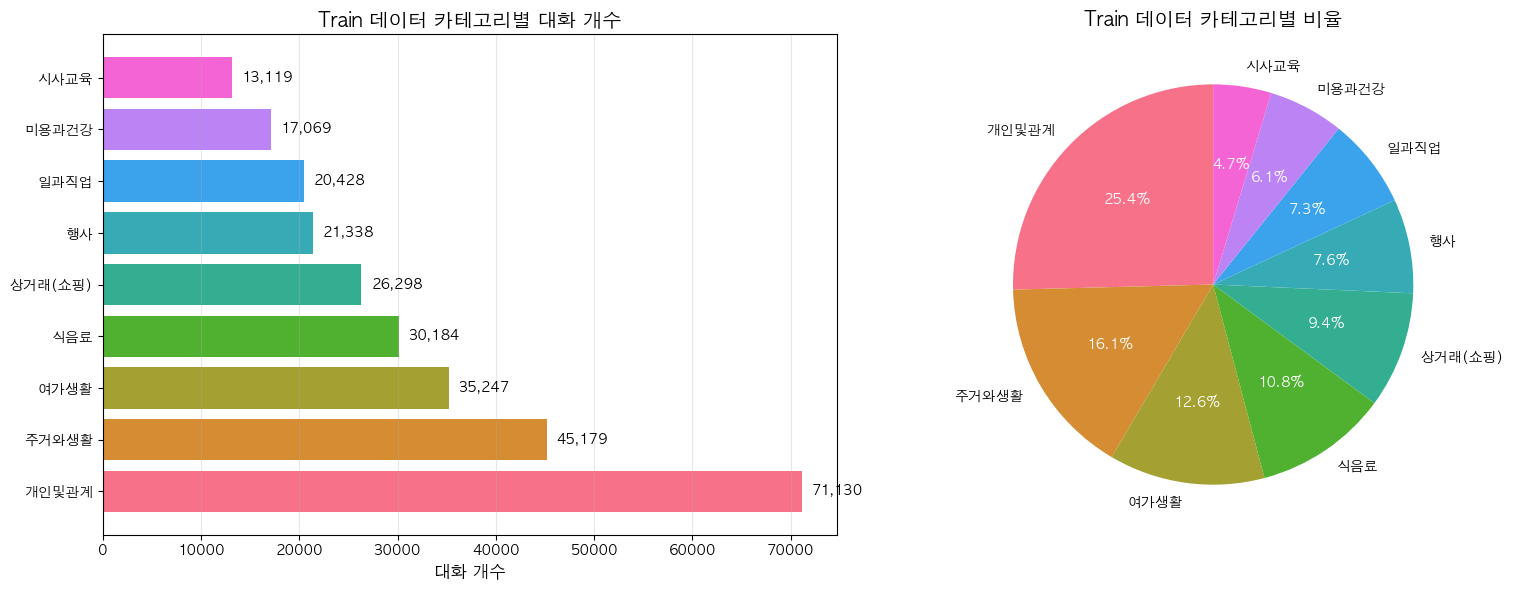


총 대화 개수: 279,992개
평균: 31110개
최대: 71,130개 (개인및관계)
최소: 13,119개 (시사교육)


In [5]:
#3.1 카테고리별 샘플 수 파이차트 시각화
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

# 한글 폰트 설정 (필요시)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 및 카테고리별 개수 계산
train_dir = Path('data/train')
category_counts = {}

for json_file in sorted(train_dir.glob('*.json')):
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # 데이터 구조에 따라 개수 계산
        if isinstance(data, dict) and 'data' in data:
            count = len(data['data'])
        elif isinstance(data, list):
            count = len(data)
        else:
            count = 0
            
        category_name = json_file.stem  # 파일명에서 확장자 제거
        category_counts[category_name] = count
        print(f'{category_name}: {count:,}개')
        
    except Exception as e:
        print(f'Error reading {json_file.name}: {e}')

# DataFrame 생성
df = pd.DataFrame({
    '카테고리': list(category_counts.keys()),
    '개수': list(category_counts.values())
})

# 개수 기준으로 정렬
df = df.sort_values('개수', ascending=False)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 막대 그래프
ax1 = axes[0]
bars = ax1.barh(df['카테고리'], df['개수'], color=sns.color_palette('husl', len(df)))
ax1.set_xlabel('대화 개수', fontsize=12)
ax1.set_title('Train 데이터 카테고리별 대화 개수', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 값 표시
for i, (idx, row) in enumerate(df.iterrows()):
    ax1.text(row['개수'] + 1000, i, f'{row["개수"]:,}', 
             va='center', fontsize=10)

# 2. 파이 차트
ax2 = axes[1]
colors = sns.color_palette('husl', len(df))
wedges, texts, autotexts = ax2.pie(df['개수'], labels=df['카테고리'], 
                                    autopct='%1.1f%%', colors=colors,
                                    startangle=90, textprops={'fontsize': 10})
ax2.set_title('Train 데이터 카테고리별 비율', fontsize=14, fontweight='bold')

# 파이 차트 텍스트 가독성 개선
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# 통계 정보 출력
print(f'\n총 대화 개수: {df["개수"].sum():,}개')
print(f'평균: {df["개수"].mean():.0f}개')
print(f'최대: {df["개수"].max():,}개 ({df.loc[df["개수"].idxmax(), "카테고리"]})')
print(f'최소: {df["개수"].min():,}개 ({df.loc[df["개수"].idxmin(), "카테고리"]})')

In [6]:
# 4. 샘플 데이터 출력
print("\n" + "="*60)
print("샘플 데이터 (처음 3개)")
print("="*60)

for i in range(min(3, len(train_df))):
    print(f"\n[샘플 {i+1}]")
    print(f"대화 길이: {len(train_df.iloc[i]['dialogue'])} 글자")
    print(f"대화: {train_df.iloc[i]['dialogue'][:200]}...")
    print(f"\n요약 길이: {len(train_df.iloc[i]['summary'])} 글자")
    print(f"요약: {train_df.iloc[i]['summary']}")
    print("-"*60)


샘플 데이터 (처음 3개)

[샘플 1]
대화 길이: 224 글자
대화: 그럼 날짜는 가격 큰 변동 없으면 6.28-7.13로 확정할까? 우리 비행포함 15일이야?? 16일! 아 #@이름#아 너 나한테 돈 보내주면 지금 할 수 잇옹 얼마야 최종 결제액이? 잠시만 인당 952,900 합쳐서 1,905,800 근데 나중에 특가 뜰 수도 있으려나..? 좀 더 두고볼까? 뜨기야 뜨겠지,, 웅웅 보니까 아시아나는 특가 이벤트 꽤 하는 것...

요약 길이: 36 글자
요약: 비행기 표 가격에 대해 이야기하며, 특가 이벤트를 기다리고 있다.
------------------------------------------------------------

[샘플 2]
대화 길이: 182 글자
대화: Kf마스크만 5부제 하는거지? 응. 면마스크는 아무때나 사도될껀? 면마스크말고 부직포 마스크 있으면 사두려구요. Kf 마스크 답답하니까 우리 둘다 비염있어서 kf마스크 쓰고 다니면 숨못쉴듯 싶어서 11번가보니깐 일회용으로 싸게나왔네. 것도 괜찮네~~ #@시스템#사진# 요고 살껀데 같이 사실분? 애들 아침마다 책상닦아야한다는데...

요약 길이: 35 글자
요약: 비염이 있어서 싸게 나온 일회용 부직포 마스크를 사두려고 한다.
------------------------------------------------------------

[샘플 3]
대화 길이: 177 글자
대화: 아 근데 케이크 업체들 봤는데 중앙동쪽 거기는 맛만있고 디자인은 그냥그런것같애 그러게; 나도 그렇게 생각함 고잔동 케이크업체는 배달도 해쥰대 안산 앙금 떡케이크 아 거기는 시간 언제까진데? 시간 안맞으면 또 못사는거자너 거기는 예매하면서 시간조율 해서 앵간하면 갖다준다네 여기가 괜찮을것같애 아 그르네 거기도 괜찮은듯...

요약 길이: 72 글자
요약: 케이크 업체 중 중앙동 쪽은 맛만 있고 디자인은 별로고 고잔동 케이크 업체는 배달도 해주고 시간 조율도 해준대서 괜찮을 거 같다.
-------------

In [6]:
# 5. 이상치 확인
print("\n📌 이상치 확인:")
q1_dialogue = dialogue_lengths.quantile(0.25)
q3_dialogue = dialogue_lengths.quantile(0.75)
iqr_dialogue = q3_dialogue - q1_dialogue

outliers_dialogue = train_df[(dialogue_lengths < q1_dialogue - 1.5 * iqr_dialogue) | 
                              (dialogue_lengths > q3_dialogue + 1.5 * iqr_dialogue)]

print(f"대화 길이 이상치 개수: {len(outliers_dialogue)}개 ({len(outliers_dialogue)/len(train_df)*100:.2f}%)")

q1_summary = summary_lengths.quantile(0.25)
q3_summary = summary_lengths.quantile(0.75)
iqr_summary = q3_summary - q1_summary

outliers_summary = train_df[(summary_lengths < q1_summary - 1.5 * iqr_summary) | 
                             (summary_lengths > q3_summary + 1.5 * iqr_summary)]

print(f"요약 길이 이상치 개수: {len(outliers_summary)}개 ({len(outliers_summary)/len(train_df)*100:.2f}%)")


📌 이상치 확인:
대화 길이 이상치 개수: 11722개 (4.19%)
요약 길이 이상치 개수: 1441개 (0.51%)


In [7]:
# 6. 길이별 구간 분석
print("\n📊 대화 길이 구간별 분포:")
bins = [0, 100, 200, 300, 500, 1000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-500', '500-1000', '1000+']
dialogue_bins = pd.cut(dialogue_lengths, bins=bins, labels=labels)
print(dialogue_bins.value_counts().sort_index())

print("\n📊 요약 길이 구간별 분포:")
bins_summary = [0, 50, 100, 150, 200, 300, float('inf')]
labels_summary = ['0-50', '50-100', '100-150', '150-200', '200-300', '300+']
summary_bins = pd.cut(summary_lengths, bins=bins_summary, labels=labels_summary)
print(summary_bins.value_counts().sort_index())


📊 대화 길이 구간별 분포:
dialogue
0-100        93931
100-200     157538
200-300      23529
300-500       4611
500-1000       377
1000+            6
Name: count, dtype: int64

📊 요약 길이 구간별 분포:
summary
0-50       207622
50-100      72267
100-150       101
150-200         2
200-300         0
300+            0
Name: count, dtype: int64


In [5]:
# KoBART 모델 다운로드 및 로드
from transformers import BartForConditionalGeneration, PreTrainedTokenizerFast
import torch

# 1. 모델과 토크나이저 다운로드
print("KoBART 모델 다운로드 중...")

model_name = "gogamza/kobart-base-v2"  # 또는 "gogamza/kobart-summarization"

# 토크나이저 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)

# 모델 로드
model = BartForConditionalGeneration.from_pretrained(model_name)

print(f"✓ 모델 다운로드 완료: {model_name}")
print(f"✓ 토크나이저 vocab 크기: {len(tokenizer)}")
print(f"✓ 모델 파라미터 수: {sum(p.numel() for p in model.parameters()):,}")

# 2. GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n사용 디바이스: {device}")

# 모델을 디바이스로 이동
model = model.to(device)

# 3. 간단한 테스트
test_text = "안녕하세요. KoBART 모델 테스트입니다."
inputs = tokenizer(test_text, return_tensors="pt").to(device)

print(f"\n테스트 입력: {test_text}")
print(f"토큰화 결과: {inputs['input_ids'].shape}")

print("\n✓ KoBART 모델 준비 완료!")


ImportError: huggingface-hub>=0.34.0,<1.0 is required for a normal functioning of this module, but found huggingface-hub==1.1.4.
Try: `pip install transformers -U` or `pip install -e '.[dev]'` if you're working with git main

In [ ]:
# 모델과 토크나이저를 로컬에 저장
save_path = "./kobart_model"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"모델 저장 완료: {save_path}")

In [ ]:
# 로컬에서 불러오기
model = BartForConditionalGeneration.from_pretrained("./kobart_model")
tokenizer = PreTrainedTokenizerFast.from_pretrained("./kobart_model")